# Data Cleansing and Preparation:
## The initial data cleansing and preparation steps were followed by the work in the source below:
### https://www.kaggle.com/code/okanulu/android-malware-prediction-with-ml-algorithms
## The choice to use only Android_SMS_Malware and Benign labels along with the  Random Forest Decision Tree model implementation, analysis, and evaluation are uniue to this notebook.t

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
import warnings

In [4]:
data = pd.read_csv("../../../data/Android_Malware.csv")
print(data)
data = data.drop(' Timestamp', axis=1)

C:\Users\grace\AppData\Local\Temp\ipykernel_33628\4204408830.py:1: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../../../data/Android_Malware.csv")


        Unnamed: 0                                  Flow ID     Source IP  \
0                0    172.217.6.202-10.42.0.211-443-50004-6   10.42.0.211   
1                1    172.217.6.202-10.42.0.211-443-35455-6   10.42.0.211   
2                2    131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
3                3    131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
4                4    131.253.61.68-10.42.0.211-443-51776-6   10.42.0.211   
...            ...                                      ...           ...   
355625         405      172.217.7.14-10.42.0.211-80-38405-6  172.217.7.14   
355626         406         10.42.0.211-10.42.0.1-7632-53-17   10.42.0.211   
355627         407  10.42.0.211-104.192.110.245-45970-443-6   10.42.0.211   
355628         408        10.42.0.211-10.42.0.1-51982-53-17   10.42.0.211   
355629         409         10.42.0.211-10.42.0.1-9320-53-17   10.42.0.211   

         Source Port   Destination IP   Destination Port   Protocol  \
0   

In [5]:
print(data.columns.tolist())

['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', 

In [6]:
print(data['Label'].value_counts())
names=sorted(data['Label'].unique().tolist())
print(names)

Label
Android_Adware         147443
Android_Scareware      117082
Android_SMS_Malware     67397
Benign                  23708
Name: count, dtype: int64
['Android_Adware', 'Android_SMS_Malware', 'Android_Scareware', 'Benign']


In [7]:
print(data.dtypes)

Unnamed: 0           int64
Flow ID             object
 Source IP          object
 Source Port         int64
 Destination IP     object
                    ...   
Idle Mean          float64
 Idle Std          float64
 Idle Max          float64
 Idle Min          float64
Label               object
Length: 85, dtype: object


In [8]:
data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355625,405,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,80,10.42.0.211,38405.0,6.0,126711,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355626,406,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,7632,10.42.0.1,53.0,17.0,48012,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355627,407,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,45970,104.192.110.245,443.0,6.0,20028018,11,8,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,Benign
355628,408,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,51982,10.42.0.1,53.0,17.0,347926,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [9]:
print("Total Features : ",len(data.columns)-1)

Total Features :  84


# Data Preprocessing done unique to this notebook:

- Filtering the Dataset: The dataset is filtered to include only two labels—'Benign' and 'Android_SMS_Malware'—by dropping irrelevant categories ('Android_Adware' and 'Android_Scareware'). This ensures the model focuses on the most relevant classification task.

- Dropping Non-Numeric Columns: Non-numeric columns, such as 'Flow ID', 'Source IP', 'Destination IP', and others, are removed from the feature set. This is critical because machine learning models, including Random Forests, require numerical input data for training.

- Ensuring Numeric Data: After dropping non-numeric columns, the feature matrix (X) is checked to ensure only numeric columns remain. This step ensures that there are no data type issues when passing the data to the model.

- Label Encoding: The target variable (y) is mapped to integers—0 for 'Benign' and 1 for 'Android_SMS_Malware'. This allows the model to interpret the categorical labels as numeric values for classification.

## Step 1: Filter the dataset to include only 'Android_SMS_Malware' and 'Benign'

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample

filtered_data = data[data["Label"].isin(['Android_SMS_Malware', 'Benign'])]

## Step 2: Drop non-numeric columns

In [11]:
X_filtered = filtered_data.drop(['Flow ID', ' Source IP', ' Destination IP', ' CWE Flag Count', ' Down/Up Ratio', 'Fwd Avg Bytes/Bulk', 'Label'], axis=1)

## Step 3: Ensure only numeric data remains

In [12]:
X_filtered_numeric = X_filtered.select_dtypes(include=[np.number])

## Verify that only numeric columns remain

In [13]:
print(X_filtered_numeric.dtypes)

Unnamed: 0             int64
 Source Port           int64
 Destination Port    float64
 Protocol            float64
 Flow Duration         int64
                      ...   
 Active Min          float64
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
Length: 78, dtype: object


## Step 4: Separate features (X) and target (y) after filtering

In [14]:
X = X_filtered_numeric
y = filtered_data["Label"]

## Step 5: Convert the target labels into numerical categories (Benign = 0, Android_SMS_Malware = 1)

In [15]:
y = y.map({'Benign': 0, 'Android_SMS_Malware': 1})

## Step 6: Check the data types of y to ensure it's numeric

In [16]:
print(y.dtypes)  # It should print "int64" or similar to indicate discrete values

int64


In [21]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in X_balanced (replace NaNs with the column mean)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or other strategies
X_balanced_imputed = imputer.fit_transform(X_balanced)

# Data Balancing: 
- Balancing Classes: Since class imbalance can negatively impact model performance, the balance_data function resamples the data to ensure both classes ('Benign' and 'Android_SMS_Malware') are equally represented. This step involves resampling the minority class (whichever has fewer samples) so that both classes have the same number of data points. After balancing, the data is shuffled to randomize the sample order.

- Ensuring Numeric Labels: The balanced target variable (y_balanced) is explicitly converted to integers. This step ensures that the model correctly interprets the labels as discrete classes during training and evaluation.

## Step 7: Balance the dataset using the balance_data function

In [17]:
def balance_data(X, y, random_state=0):
    # Combine X and y into one DataFrame
    data = pd.concat([X, y], axis=1)
    class_counts = y.value_counts()
    minority_class_count = class_counts.min()
    balanced_data = pd.DataFrame(columns=data.columns)

    for label in class_counts.index:
        class_samples = data[data["Label"] == label]
        resampled_samples = resample(class_samples,
                                     replace=True,
                                     n_samples=minority_class_count,
                                     random_state=random_state)
        balanced_data = pd.concat([balanced_data, resampled_samples])

    balanced_data = balanced_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
    return balanced_data.drop("Label", axis=1), balanced_data["Label"]

## Step 8: Balance the data

In [18]:
X_balanced, y_balanced = balance_data(X, y)

## Step 9: Ensure y_balanced is correctly mapped to integers

In [19]:
y_balanced = y_balanced.astype(int)
print(y_balanced.dtypes)  

int32


# Model Evaluation: 
- Random Forest Configurations: Six different Random Forest models are configured, each with varying parameters such as the number of trees (n_estimators), maximum tree depth (max_depth), and class weight balancing (class_weight). These variations allow for the exploration of different hyperparameters to find the best-performing model for the dataset.

- 10-fold Cross-Validation: The cross_val_predict function is used to perform 10-fold cross-validation on the balanced dataset. In this process:
The dataset is split into 10 equal subsets (folds).
For each fold, the model is trained on 9 subsets and evaluated on the remaining subset.
This process is repeated across all 10 folds, ensuring that every data point is used both for training and evaluation.
Cross-validation helps to mitigate overfitting by providing a more robust evaluation, ensuring the model generalizes well to unseen data.

# Evaluation Metrics: 
### Evaluation Metrics: For each Random Forest configuration:
- cross_val_score: to evaluate the accuracy on each fold. The accuracy for each fold is shown along with the average of all folds.
- Accuracy: The accuracy for each fold is calculated, along with the average accuracy across all 10 folds. This provides an overall measure of model performance.
- Confusion Matrix: A confusion matrix is generated to show how well the model predicts each class ('Benign' vs. 'Android_SMS_Malware').
- Classification Report: A detailed classification report provides precision, recall, F1-score, and support for each class, offering insight into how well the model distinguishes between 'Benign' and 'Android_SMS_Malware'.
# Conclusion: 
By balancing the data, encoding the target labels, and using 10-fold cross-validation, this approach provides a comprehensive and robust evaluation of the different Random Forest configurations. The results from each model allow the user to select the most effective configuration for classifying 'Benign' and 'Android_SMS_Malware' traffic, ensuring the model performs well on new data.orest models

============================== Random Forest Classifier 100 trees Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.91164066 0.91353859 0.91142978 0.91628005 0.91058625 0.91754534
 0.90930184 0.91752795 0.91731702 0.90677072]
Mean Accuracy across folds: 0.9132


Model Accuracy (combined prediction): 91.32%
Confusion Matrix:
 [[22265  1443]
 [ 2673 21035]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     23708
           1       0.94      0.89      0.91     23708

    accuracy                           0.91     47416
   macro avg       0.91      0.91      0.91     47416
weighted avg       0.91      0.91      0.91     47416




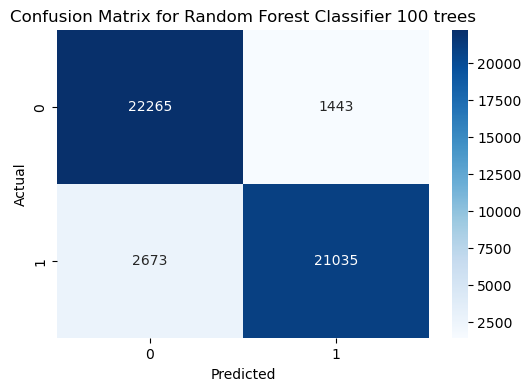

============================== Random Forest Classifier 200 trees Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.91248418 0.91438212 0.91206242 0.91585829 0.91164066 0.91670181
 0.91204387 0.9187935  0.91584054 0.90866906]
Mean Accuracy across folds: 0.9138


Model Accuracy (combined prediction): 91.38%
Confusion Matrix:
 [[22239  1469]
 [ 2616 21092]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     23708
           1       0.93      0.89      0.91     23708

    accuracy                           0.91     47416
   macro avg       0.91      0.91      0.91     47416
weighted avg       0.91      0.91      0.91     47416




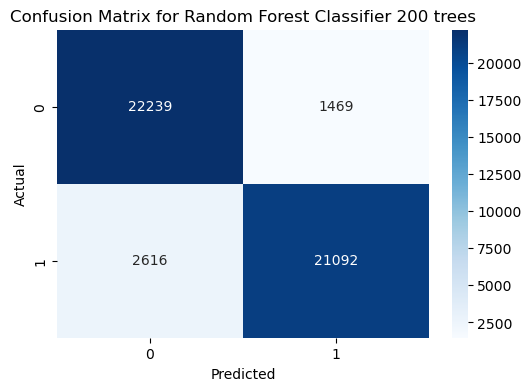

============================== Random Forest Classifier 300 trees Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.91248418 0.91480388 0.91206242 0.91501476 0.91206242 0.91543652
 0.91120017 0.91921536 0.91626239 0.91077832]
Mean Accuracy across folds: 0.9139


Model Accuracy (combined prediction): 91.39%
Confusion Matrix:
 [[22252  1456]
 [ 2625 21083]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     23708
           1       0.94      0.89      0.91     23708

    accuracy                           0.91     47416
   macro avg       0.91      0.91      0.91     47416
weighted avg       0.91      0.91      0.91     47416




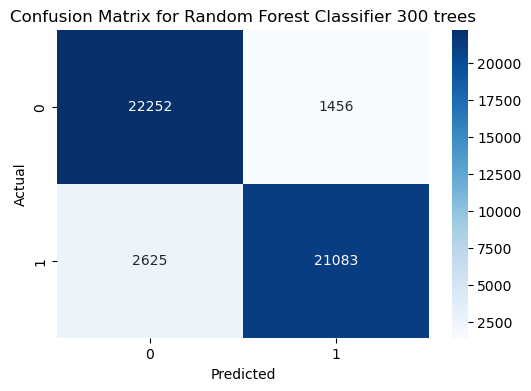

============================== Random Forest Classifier with max depth 10 Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.83129481 0.83234922 0.82707718 0.83424715 0.83087305 0.82770983
 0.8302046  0.83463404 0.83315756 0.826197  ]
Mean Accuracy across folds: 0.8308


Model Accuracy (combined prediction): 83.08%
Confusion Matrix:
 [[22086  1622]
 [ 6402 17306]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85     23708
           1       0.91      0.73      0.81     23708

    accuracy                           0.83     47416
   macro avg       0.84      0.83      0.83     47416
weighted avg       0.84      0.83      0.83     47416




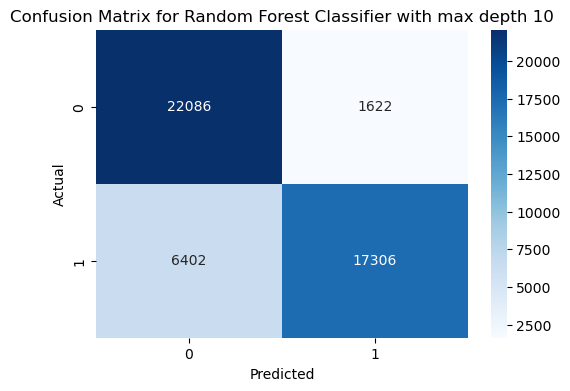

============================== Random Forest Classifier with max depth 20 Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.89814424 0.89877689 0.89962041 0.90257275 0.89898777 0.90425981
 0.89896646 0.90107572 0.90191943 0.8951698 ]
Mean Accuracy across folds: 0.8999


Model Accuracy (combined prediction): 89.99%
Confusion Matrix:
 [[22462  1246]
 [ 3498 20210]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.90     23708
           1       0.94      0.85      0.89     23708

    accuracy                           0.90     47416
   macro avg       0.90      0.90      0.90     47416
weighted avg       0.90      0.90      0.90     47416




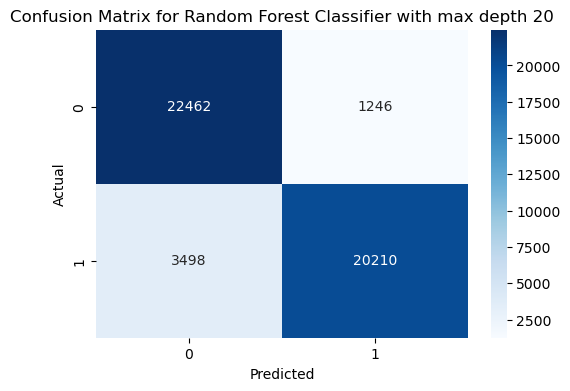

============================== Random Forest Classifier with balanced class weight Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.91164066 0.91353859 0.91142978 0.91628005 0.91058625 0.91754534
 0.90972369 0.91647332 0.91520776 0.91330943]
Mean Accuracy across folds: 0.9136


Model Accuracy (combined prediction): 91.36%
Confusion Matrix:
 [[22271  1437]
 [ 2661 21047]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     23708
           1       0.94      0.89      0.91     23708

    accuracy                           0.91     47416
   macro avg       0.91      0.91      0.91     47416
weighted avg       0.91      0.91      0.91     47416




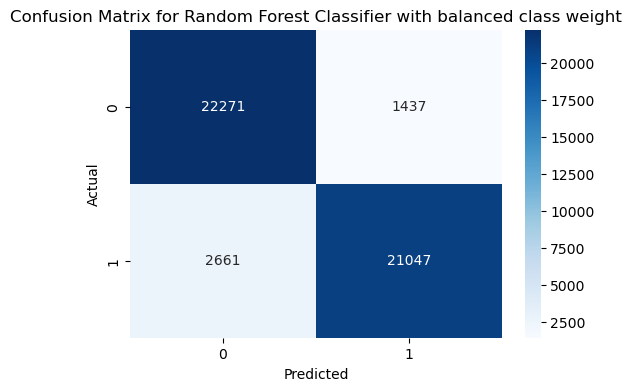

In [22]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Step 10: Define and run the different Random Forest models data.r new data.
models = [
    ('Random Forest Classifier 100 trees', RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier 200 trees', RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier 300 trees', RandomForestClassifier(n_estimators=300, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier with max depth 10', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier with max depth 20', RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier with balanced class weight', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0, n_jobs=-1))
]

# Step 11: Function to evaluate the model using cross-validation
def evaluate_model_cv(model, X, y, model_name):
    # Get predictions using cross-validation
    y_pred = cross_val_predict(model, X, y, cv=10, n_jobs=-1)
    
    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    
    # Generate confusion matrix
    confusion_matrix_result = confusion_matrix(y, y_pred)
    
    # Generate classification report
    classification = classification_report(y, y_pred)

    # Perform 10-fold cross-validation to get accuracy for each fold
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy', n_jobs=-1)
    
    # Print evaluation results
    print(f'============================== {model_name} Cross-Validation Evaluation ==============================')
    
   # Print accuracy for each fold and the mean accuracy
    print(f"Accuracy for each fold: {scores}")
    print(f"Mean Accuracy across folds: {np.mean(scores):.4f}")
    print("\n")
    
    # Print overall evaluation using combined cross-validation predictions
    print(f'Model Accuracy (combined prediction): {accuracy * 100:.2f}%')
    print('Confusion Matrix:\n', confusion_matrix_result)
    print('Classification Report:\n', classification)
    print()

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Step 12: Iterate through each Random Forest model and evaluate using cross-validation
for model_name, model in models:
    evaluate_model_cv(model, X_balanced_imputed, y_balanced, model_name)

```
# Results saved to perserve format.
============================== Random Forest Classifier 100 trees Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.91164066 0.91353859 0.91142978 0.91628005 0.91058625 0.91754534
 0.90930184 0.91752795 0.91731702 0.90677072]
Mean Accuracy across folds: 0.9132


Model Accuracy (combined prediction): 91.32%
Confusion Matrix:
 [[22265  1443]
 [ 2673 21035]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     23708
           1       0.94      0.89      0.91     23708

    accuracy                           0.91     47416
   macro avg       0.91      0.91      0.91     47416
weighted avg       0.91      0.91      0.91     47416



============================== Random Forest Classifier 200 trees Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.91248418 0.91438212 0.91206242 0.91585829 0.91164066 0.91670181
 0.91204387 0.9187935  0.91584054 0.90866906]
Mean Accuracy across folds: 0.9138


Model Accuracy (combined prediction): 91.38%
Confusion Matrix:
 [[22239  1469]
 [ 2616 21092]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     23708
           1       0.93      0.89      0.91     23708

    accuracy                           0.91     47416
   macro avg       0.91      0.91      0.91     47416
weighted avg       0.91      0.91      0.91     47416



============================== Random Forest Classifier 300 trees Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.91248418 0.91480388 0.91206242 0.91501476 0.91206242 0.91543652
 0.91120017 0.91921536 0.91626239 0.91077832]
Mean Accuracy across folds: 0.9139


Model Accuracy (combined prediction): 91.39%
Confusion Matrix:
 [[22252  1456]
 [ 2625 21083]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     23708
           1       0.94      0.89      0.91     23708

    accuracy                           0.91     47416
   macro avg       0.91      0.91      0.91     47416
weighted avg       0.91      0.91      0.91     47416



============================== Random Forest Classifier with max depth 10 Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.83129481 0.83234922 0.82707718 0.83424715 0.83087305 0.82770983
 0.8302046  0.83463404 0.83315756 0.826197  ]
Mean Accuracy across folds: 0.8308


Model Accuracy (combined prediction): 83.08%
Confusion Matrix:
 [[22086  1622]
 [ 6402 17306]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85     23708
           1       0.91      0.73      0.81     23708

    accuracy                           0.83     47416
   macro avg       0.84      0.83      0.83     47416
weighted avg       0.84      0.83      0.83     47416



============================== Random Forest Classifier with max depth 20 Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.89814424 0.89877689 0.89962041 0.90257275 0.89898777 0.90425981
 0.89896646 0.90107572 0.90191943 0.8951698 ]
Mean Accuracy across folds: 0.8999


Model Accuracy (combined prediction): 89.99%
Confusion Matrix:
 [[22462  1246]
 [ 3498 20210]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.90     23708
           1       0.94      0.85      0.89     23708

    accuracy                           0.90     47416
   macro avg       0.90      0.90      0.90     47416
weighted avg       0.90      0.90      0.90     47416



============================== Random Forest Classifier with balanced class weight Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.91164066 0.91353859 0.91142978 0.91628005 0.91058625 0.91754534
 0.90972369 0.91647332 0.91520776 0.91330943]
Mean Accuracy across folds: 0.9136


Model Accuracy (combined prediction): 91.36%
Confusion Matrix:
 [[22271  1437]
 [ 2661 21047]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     23708
           1       0.94      0.89      0.91     23708

    accuracy                           0.91     47416
   macro avg       0.91      0.91      0.91     47416
weighted avg       0.91      0.91      0.91     47416
```